___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME

This notebook will guide you through two increasingly significant applications in the realm of Generative AI: RAG (Retrieval Augmented Generation) chatbots and text summarization for big text.

Through two distinct projects, you will explore these technologies and enhance your skills. Detailed descriptions of the projects are provided below.

## Project 1: Building a Chatbot with a PDF Document (RAG)

In this project, you will develop a chatbot using a provided PDF document from web page. You will utilize the Langchain framework along with a large language model (LLM) such as GPT or Gemini. The chatbot will leverage the Retrieval Augmented Generation (RAG) technique to comprehend the document's content and respond to user queries effectively.

### **Project Steps:**

- **1.PDF Document Upload:** Upload the provided PDF document from web page (https://aclanthology.org/N19-1423.pdf) (BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding).

- **2.Chunking:** Divide the uploaded PDF document into smaller segments (chunks). This facilitates more efficient information processing by the LLM.

- **3.ChromaDB Setup:**
  - Save ChromaDB to your Google Drive.

  - Retrieve ChromaDB from your Drive to begin using it in your project.

  - ChromaDB serves as a vector database to store embedding vectors generated from your document.

- **4.Embedding Vectors Creation:**
  - Convert the chunked document into embedding vectors. You can use either GPT or Gemini embedding models for this purpose.

  - If you choose the Gemini embedding model, set "task_type" to "retrieval_document" when converting the chunked document.

- **5.Chatbot Development:**
  - Utilize the **load_qa_chain** function from the Langchain library to build the chatbot.

  - This function will interpret user queries, retrieve relevant information from **ChromaDB**, and generate responses accordingly.



### Install Libraries

In [1]:
!pip install langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 539.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.2/396.2 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.7/150.7 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [2]:
!pip install -qU langchain-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 877.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 12.0 MB/s eta 0:00:00


In [3]:
!pip install -qU langchain-google-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.3 MB/s eta 0:00:00


In [4]:
!pip install -qU langchain-community

In [5]:
!pip install -qU langchain-chroma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 1.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 559.5/559.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.7/149.7 kB 11.1 MB/s eta 0:00:0

In [6]:
!pip install -qU pypdfium2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 770.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 12.7 MB/s eta 0:00:00


### Access Google Drive

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Entering Your OpenAI or Google Gemini API Key.

In [9]:
import os
from google.colab import userdata

os.environ['OPENAI_API_KEY']=userdata.get('OPENAI_KEY')

### Loading PDF Document

In [66]:
# create a pdf reader function
from langchain.document_loaders import PyPDFium2Loader

def read_doc(directory):
    file_loader=PyPDFium2Loader(directory)
    pdf_documents=file_loader.load() # PyPDFium2Loader reads page by page
    return pdf_documents


In [67]:
pdf=read_doc('/content/drive/MyDrive/N19-1423.pdf')
len(pdf)

/usr/local/lib/python3.10/dist-packages/pypdfium2/_helpers/textpage.py:80: UserWarning: get_text_range() call with default params will be implicitly redirected to get_text_bounded()
  warnings.warn("get_text_range() call with default params will be implicitly redirected to get_text_bounded()")


16

### Document Splitter

In [68]:
from langchain.text_splitter import RecursiveCharacterTextSplitter, CharacterTextSplitter


def chunk_data(docs, chunk_size=1000, chunk_overlap=200):
    text_splitter=RecursiveCharacterTextSplitter(chunk_size=chunk_size,
                                                 chunk_overlap=chunk_overlap)
    pdf=text_splitter.split_documents(docs)
    return pdf

# This code splits documents into chunks using the RecursiveCharacterTextSplitter class from the langchain library.

# A function named chunk_data is defined, which takes a document or a collection of documents (docs) as input.
# It also takes two parameters: chunk_size and chunk_overlap.
# chunk_size specifies the maximum number of characters in each chunk, while chunk_overlap determines the amount of overlap between consecutive chunks.

# The function divides the documents into chunks based on these parameters using the RecursiveCharacterTextSplitter class.
# Consequently, each chunk contains chunk_size characters, with an overlap of chunk_overlap characters between consecutive chunks.

# As a result, the documents are segmented into chunks of specified sizes, and these chunks are returned.

# The chunk_overlap parameter is used to specify the sharing of characters between consecutive chunks.
# In other words, it ensures that the characters at the end of one chunk reappear at the beginning of the next chunk.
# This prevents the loss of information when the text is segmented or divided and helps preserve a certain context.
# Especially, overlap can be used to maintain important contextual relationships within a specific text and sustain meaning across chunks.

In [69]:
pdf_doc=chunk_data(docs=pdf)
len(pdf_doc)

84

In [15]:
pdf_doc[15:17]

[Document(metadata={'source': '/content/drive/MyDrive/N19-1423.pdf', 'page': 2}, page_content='H, and the number of self-attention heads as A.\r\n3\r\nWe primarily report results on two model sizes:\r\nBERTBASE (L=12, H=768, A=12, Total Param\x02eters=110M) and BERTLARGE (L=24, H=1024,\r\nA=16, Total Parameters=340M).\r\nBERTBASE was chosen to have the same model\r\nsize as OpenAI GPT for comparison purposes.\r\nCritically, however, the BERT Transformer uses\r\nbidirectional self-attention, while the GPT Trans\x02former uses constrained self-attention where every\r\ntoken can only attend to context to its left.4\r\n1\r\nhttps://github.com/tensorflow/tensor2tensor\r\n2\r\nhttp://nlp.seas.harvard.edu/2018/04/03/attention.html\r\n3\r\nIn all cases we set the feed-forward/filter size to be 4H,\r\ni.e., 3072 for the H = 768 and 4096 for the H = 1024.\r\n4We note that in the literature the bidirectional Trans-'),
 Document(metadata={'source': '/content/drive/MyDrive/N19-1423.pdf', 'page': 3}

### 1. Creating An Embedding Model
### 2. Convert the Each Chunk of The Split Document to Embedding Vectors
### 3. Storing of The Embedding Vectors to Vectorstore
### 4. Save the Vectorstore to Your Drive

In [70]:
from langchain_openai import OpenAIEmbeddings

embeddings=OpenAIEmbeddings(model="text-embedding-3-large",
                            dimensions=3072)   # generated embedding vectors with dimension 3072
embeddings

# As the embedding model, we use Openai's latest introduced text-embedding-3-large model.
# dimensions of text-embedding-3-large are 256, 1024 and 3072
# dimensions of text-embedding-3-small are 512 and 1536
# dimension of text-embedding-ada-002 is only 1536
# text-embedding-3-large gives the best embedding performance

OpenAIEmbeddings(client=<openai.resources.embeddings.Embeddings object at 0x7d10b42a0310>, async_client=<openai.resources.embeddings.AsyncEmbeddings object at 0x7d10a08d67d0>, model='text-embedding-3-large', dimensions=3072, deployment='text-embedding-ada-002', openai_api_version='', openai_api_base=None, openai_api_type='', openai_proxy='', embedding_ctx_length=8191, openai_api_key=SecretStr('**********'), openai_organization=None, allowed_special=None, disallowed_special=None, chunk_size=1000, max_retries=2, request_timeout=None, headers=None, tiktoken_enabled=True, tiktoken_model_name=None, show_progress_bar=False, model_kwargs={}, skip_empty=False, default_headers=None, default_query=None, retry_min_seconds=4, retry_max_seconds=20, http_client=None, http_async_client=None, check_embedding_ctx_length=True)

In [17]:
text = "This is a proje document."

In [18]:
doc_result = embeddings.embed_documents([text])

In [19]:
doc_result[0][:5]

[-0.012167209759354591,
 -0.014666931703686714,
 -0.030242852866649628,
 0.03153058886528015,
 -0.01176952663809061]

In [20]:
len(doc_result[0])

3072

### Load Vectorstore(index) From Your Drive or Create New Vectorstore Directory

In [71]:
vectorstore_dir = "/content/drive/MyDrive/vectorstore"

from langchain_chroma import Chroma

In [72]:
# Function to load or create Chroma index
def load_or_create_chroma(pdf_chunks, vectorstore_dir):
    # Initialize OpenAI embeddings
    embeddings = OpenAIEmbeddings(model="text-embedding-3-large", dimensions=3072, openai_api_key=os.getenv('OPENAI_API_KEY'))

    # Check if the vectorstore directory exists
    if os.path.exists(vectorstore_dir):
        # Load existing Chroma index
        loaded_index = Chroma(persist_directory=vectorstore_dir, embedding_function=embeddings)
        print("Loaded existing Chroma index from the directory.")
        load_retriever = loaded_index.as_retriever(search_kwargs={"k": 5})
        return loaded_index, load_retriever
    else:
        # Create new Chroma index from document chunks
        index = Chroma.from_documents(documents=pdf_chunks, embedding=embeddings, persist_directory=vectorstore_dir)
        print("Created a new Chroma index and saved it to the directory.")
        retriever = index.as_retriever(search_kwargs={"k": 5})
        return index, retriever

# Load or create the Chroma index
index, retriever = load_or_create_chroma(pdf_doc, vectorstore_dir)

Loaded existing Chroma index from the directory.


In [73]:
retriever.invoke("What is Bert?")

# retriever.invoke first converts text to embedding vector with embedding algorithm
# Then looks at the similarity scores with each of the 84 pieces and ranks them
# Since k=5, it takes the 5 most similar vectors and returns the original texts corresponding to these vectors

[Document(metadata={'page': 0, 'source': '/content/drive/MyDrive/N19-1423.pdf'}, page_content='to create state-of-the-art models for a wide\r\nrange of tasks, such as question answering and\r\nlanguage inference, without substantial task\x02specific architecture modifications.\r\nBERT is conceptually simple and empirically\r\npowerful. It obtains new state-of-the-art re\x02sults on eleven natural language processing\r\ntasks, including pushing the GLUE score to\r\n80.5% (7.7% point absolute improvement),\r\nMultiNLI accuracy to 86.7% (4.6% absolute\r\nimprovement), SQuAD v1.1 question answer\x02ing Test F1 to 93.2 (1.5 point absolute im\x02provement) and SQuAD v2.0 Test F1 to 83.1\r\n(5.1 point absolute improvement).\r\n1 Introduction\r\nLanguage model pre-training has been shown to\r\nbe effective for improving many natural language\r\nprocessing tasks (Dai and Le, 2015; Peters et al.,\r\n2018a; Radford et al., 2018; Howard and Ruder,\r\n2018). These include sentence-level tasks such 

### Retrival the First 5 Chunks That Are Most Similar to The User Query from The Document

In [87]:
def retrieve_query(query,k=5):
    retriever=index.as_retriever(search_kwargs={"k": k}) #loaded_index
    return retriever.invoke(query)

In [88]:
our_query = "What is Fine-Tuning ?"

doc_search=retrieve_query(our_query, k=5) # first five most similar texts are returned
doc_search

[Document(metadata={'page': 4, 'source': '/content/drive/MyDrive/N19-1423.pdf'}, page_content='answering, and the [CLS] representation is fed\r\ninto an output layer for classification, such as en\x02tailment or sentiment analysis.\r\nCompared to pre-training, fine-tuning is rela\x02tively inexpensive. All of the results in the pa\x02per can be replicated in at most 1 hour on a sin\x02gle Cloud TPU, or a few hours on a GPU, starting\r\nfrom the exact same pre-trained model.7 We de\x02scribe the task-specific details in the correspond\x02ing subsections of Section 4. More details can be\r\nfound in Appendix A.5.\r\n4 Experiments\r\nIn this section, we present BERT fine-tuning re\x02sults on 11 NLP tasks.\r\n4.1 GLUE\r\nThe General Language Understanding Evaluation\r\n(GLUE) benchmark (Wang et al., 2018a) is a col\x02lection of diverse natural language understanding\r\ntasks. Detailed descriptions of GLUE datasets are\r\nincluded in Appendix B.1.\r\nTo fine-tune on GLUE, we represent the

In [89]:
our_query = "What is the advantages of Fine-Tuning?"

doc_search=retrieve_query(our_query, k=5) # first five most similar texts are returned
doc_search

[Document(metadata={'page': 13, 'source': '/content/drive/MyDrive/N19-1423.pdf'}, page_content='[SEP], [CLS] and sentence A/B embed\x02dings during pre-training.\r\n• GPT was trained for 1M steps with a batch\r\nsize of 32,000 words; BERT was trained for\r\n1M steps with a batch size of 128,000 words.\r\n• GPT used the same learning rate of 5e-5 for\r\nall fine-tuning experiments; BERT chooses a\r\ntask-specific fine-tuning learning rate which\r\nperforms the best on the development set.\r\nTo isolate the effect of these differences, we per\x02form ablation experiments in Section 5.1 which\r\ndemonstrate that the majority of the improvements\r\nare in fact coming from the two pre-training tasks\r\nand the bidirectionality they enable.\r\nA.5 Illustrations of Fine-tuning on Different\r\nTasks\r\nThe illustration of fine-tuning BERT on different\r\ntasks can be seen in Figure 4. Our task-specific\r\nmodels are formed by incorporating BERT with\r\none additional output layer, so a minimal

In [90]:
our_query = "How does BERT handle single and paired sentences, and what kind of embeddings and vocabulary size does it use?"

doc_search=retrieve_query(our_query, k=5) # first five most similar texts are returned
doc_search

[Document(metadata={'page': 3, 'source': '/content/drive/MyDrive/N19-1423.pdf'}, page_content='4174\r\nInput/Output Representations To make BERT\r\nhandle a variety of down-stream tasks, our input\r\nrepresentation is able to unambiguously represent\r\nboth a single sentence and a pair of sentences\r\n(e.g., h Question, Answeri) in one token sequence.\r\nThroughout this work, a “sentence” can be an arbi\x02trary span of contiguous text, rather than an actual\r\nlinguistic sentence. A “sequence” refers to the in\x02put token sequence to BERT, which may be a sin\x02gle sentence or two sentences packed together.\r\nWe use WordPiece embeddings (Wu et al.,\r\n2016) with a 30,000 token vocabulary. The first\r\ntoken of every sequence is always a special clas\x02sification token ([CLS]). The final hidden state\r\ncorresponding to this token is used as the ag\x02gregate sequence representation for classification\r\ntasks. Sentence pairs are packed together into a\r\nsingle sequence. We differe

In [91]:
our_query = "What are the training methodologies used by BERT, and how does it incorporate a unified architecture, pre-training, and fine-tuning phases?"

doc_search=retrieve_query(our_query, k=5) # first five most similar texts are returned
doc_search

[Document(metadata={'page': 2, 'source': '/content/drive/MyDrive/N19-1423.pdf'}, page_content='We introduce BERT and its detailed implementa\x02tion in this section. There are two steps in our\r\nframework: pre-training and fine-tuning. Dur\x02ing pre-training, the model is trained on unlabeled\r\ndata over different pre-training tasks. For fine\x02tuning, the BERT model is first initialized with\r\nthe pre-trained parameters, and all of the param\x02eters are fine-tuned using labeled data from the\r\ndownstream tasks. Each downstream task has sep\x02arate fine-tuned models, even though they are ini\x02tialized with the same pre-trained parameters. The\r\nquestion-answering example in Figure 1 will serve\r\nas a running example for this section.\r\nA distinctive feature of BERT is its unified ar\x02chitecture across different tasks. There is mini\x02mal difference between the pre-trained architec\x02ture and the final downstream architecture.'),
 Document(metadata={'page': 2, 'source':

In [92]:
our_query = "How does BERT perform on benchmarks like GLUE, SQuAD, and SWAG, and what are the specific improvements achieved by BERTLARGE over other models?"
doc_search=retrieve_query(our_query, k=5) # first five most similar texts are returned
doc_search

[Document(metadata={'page': 5, 'source': '/content/drive/MyDrive/N19-1423.pdf'}, page_content='4.5% and 7.0% respective average accuracy im\x02provement over the prior state of the art. Note that\r\nBERTBASE and OpenAI GPT are nearly identical\r\nin terms of model architecture apart from the at\x02tention masking. For the largest and most widely\r\nreported GLUE task, MNLI, BERT obtains a 4.6%\r\nabsolute accuracy improvement. On the official\r\nGLUE leaderboard10, BERTLARGE obtains a score\r\nof 80.5, compared to OpenAI GPT, which obtains\r\n72.8 as of the date of writing.\r\nWe find that BERTLARGE significantly outper\x02forms BERTBASE across all tasks, especially those\r\nwith very little training data. The effect of model\r\nsize is explored more thoroughly in Section 5.2.\r\n4.2 SQuAD v1.1\r\nThe Stanford Question Answering Dataset\r\n(SQuAD v1.1) is a collection of 100k crowd\x02sourced question/answer pairs (Rajpurkar et al.,\r\n2016). Given a question and a passage from\r\n9The

### Generating an Answer Based on The Similar Chunks

In [93]:
from langchain.prompts import PromptTemplate

template="""Use the following pieces of context to answer the user's question of "{question}".
If you don't know the answer, just say that you don't know, don't try to make up an answer.
----------------
"{context}" """

prompt_template = PromptTemplate(
    input_variables =['question','context'],
    template = template
)

### Pipeline For RAG (If you want, you can use the gemini-1.5-pro model)

In [94]:
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser

llm=ChatOpenAI(model_name="gpt-4o-mini",
               temperature=0,
               top_p=1)

chain = prompt_template | llm | StrOutputParser()

output= chain.invoke({"question":our_query, "context":doc_search}) # first five most similar texts are returned
output

'BERT performs exceptionally well on several benchmarks, achieving state-of-the-art results across various natural language processing tasks. Specifically, on the GLUE benchmark, BERTLARGE scores 80.5, which is a 7.7% absolute improvement over the previous state-of-the-art. For the MultiNLI task, BERTLARGE achieves an accuracy of 86.7, marking a 4.6% absolute improvement. In the SQuAD v1.1 benchmark, BERTLARGE reaches a Test F1 score of 93.2, which is a 1.5 point absolute improvement, and for SQuAD v2.0, it scores 83.1, representing a 5.1 point absolute improvement.\n\nBERTLARGE significantly outperforms BERTBASE across all tasks, particularly in scenarios with limited training data. The improvements achieved by BERTLARGE over other models, such as OpenAI GPT, include a notable increase in accuracy and F1 scores across the evaluated tasks, demonstrating its effectiveness and robustness in handling various natural language processing challenges.'

In [95]:
from IPython.display import Markdown

Markdown(output)

BERT performs exceptionally well on several benchmarks, achieving state-of-the-art results across various natural language processing tasks. Specifically, on the GLUE benchmark, BERTLARGE scores 80.5, which is a 7.7% absolute improvement over the previous state-of-the-art. For the MultiNLI task, BERTLARGE achieves an accuracy of 86.7, marking a 4.6% absolute improvement. In the SQuAD v1.1 benchmark, BERTLARGE reaches a Test F1 score of 93.2, which is a 1.5 point absolute improvement, and for SQuAD v2.0, it scores 83.1, representing a 5.1 point absolute improvement.

BERTLARGE significantly outperforms BERTBASE across all tasks, particularly in scenarios with limited training data. The improvements achieved by BERTLARGE over other models, such as OpenAI GPT, include a notable increase in accuracy and F1 scores across the evaluated tasks, demonstrating its effectiveness and robustness in handling various natural language processing challenges.

In [96]:
def get_answers(query, k=5):
    from langchain_openai import ChatOpenAI
    from langchain_core.output_parsers import StrOutputParser
    from langchain.prompts import PromptTemplate
    from IPython.display import Markdown

    doc_search=retrieve_query(query, k=k) # most similar texts are returned


    template="""Use the following pieces of context to answer the user's question of {question}.
    If you don't know the answer, just say that you don't know, don't try to make up an answer.
    ----------------
    {context}"""

    prompt_template = PromptTemplate(
    input_variables =['question','context'],
    template = template)


    llm=ChatOpenAI(model_name="gpt-4o-mini",
                  temperature=0,
                  top_p=1)

    chain = prompt_template | llm | StrOutputParser()

    output= chain.invoke({"question":query, "context":doc_search}) # first five most similar texts are returned
    return Markdown(output)

In [97]:
our_query = "What is Fine-Tuning?"
answer = get_answers(our_query)
answer

Fine-tuning is a process in machine learning, particularly in natural language processing (NLP), where a pre-trained model is further trained on a specific task with a smaller dataset. This process is relatively inexpensive compared to the initial pre-training phase and typically involves adjusting a few parameters, such as the classification layer weights, to adapt the model to the new task. Fine-tuning allows the model to leverage the knowledge gained during pre-training while specializing in the nuances of the specific task at hand.

In [98]:
our_query = "What is the advantages of Fine-Tuning?"
answer = get_answers(our_query)
answer

The advantages of fine-tuning include:

1. **Task-Specific Adaptation**: Fine-tuning allows a pre-trained model to be adapted specifically for a particular task by adding a minimal number of parameters (such as an output layer), which helps in achieving better performance on that task.

2. **Efficiency**: Fine-tuning is relatively inexpensive in terms of computational resources and time. For example, it can be completed in about an hour on a single Cloud TPU or a few hours on a GPU, starting from a pre-trained model.

3. **Utilization of Pre-Trained Knowledge**: Fine-tuning leverages the knowledge gained during pre-training, which can lead to improved performance on downstream tasks compared to training a model from scratch.

4. **Flexibility**: It allows for the exploration of various tasks without the need to retrain the entire model, as only the task-specific parameters need to be learned.

5. **Improved Performance**: Fine-tuning can lead to significant improvements in performance metrics, as seen in various benchmarks like GLUE, where fine-tuned models achieve high accuracy on diverse natural language understanding tasks.

In [99]:
our_query = "How does BERT handle single and paired sentences, and what kind of embeddings and vocabulary size does it use?"
answer = get_answers(our_query)
answer

BERT handles both single and paired sentences by representing them in a single token sequence. A "sequence" can consist of either a single sentence or two sentences packed together. To differentiate between the two sentences in a pair, BERT uses a special token ([SEP]) to separate them and adds a learned embedding to each token indicating whether it belongs to sentence A or sentence B.

BERT utilizes WordPiece embeddings with a vocabulary size of 30,000 tokens. The first token of every sequence is a special classification token ([CLS]), and the final hidden state corresponding to this token is used as the aggregate sequence representation for classification tasks. The input representation for each token is constructed by summing the corresponding token, segment, and position embeddings.

In [100]:
our_query = "What are the training methodologies used by BERT, and how does it incorporate a unified architecture, pre-training, and fine-tuning phases?"
answer = get_answers(our_query)
answer

BERT employs a two-step training methodology consisting of pre-training and fine-tuning phases. 

1. **Pre-training**: During this phase, BERT is trained on unlabeled data using different pre-training tasks, specifically the Masked Language Model (MLM) and Next Sentence Prediction (NSP). The MLM randomly masks some tokens in the input, and the model's objective is to predict the original tokens. NSP involves predicting whether a given sentence follows another sentence, which helps the model understand the relationship between sentences.

2. **Fine-tuning**: After pre-training, the BERT model is initialized with the pre-trained parameters and then fine-tuned on labeled data for specific downstream tasks, such as question answering or named entity recognition. Each downstream task has its own fine-tuned model, but all models are initialized with the same pre-trained parameters. During fine-tuning, all parameters of the model are adjusted based on the labeled data.

A distinctive feature of BERT is its **unified architecture**. There is minimal difference between the architecture used during pre-training and the architecture used during fine-tuning, allowing for a seamless transition between the two phases. This unified approach enables BERT to achieve state-of-the-art results across various natural language processing tasks without requiring substantial modifications to the architecture for each specific task.

In [101]:
our_query = "How does BERT perform on benchmarks like GLUE, SQuAD, and SWAG, and what are the specific improvements achieved by BERTLARGE over other models?"
answer = get_answers(our_query)
answer

BERT performs exceptionally well on various benchmarks, achieving state-of-the-art results across multiple natural language processing tasks. Specifically, on the GLUE benchmark, BERTLARGE scores 80.5, which is a 7.7% absolute improvement over the previous state of the art. For the MultiNLI task, BERTLARGE achieves an accuracy of 86.7, marking a 4.6% absolute improvement. In the SQuAD v1.1 benchmark, BERTLARGE reaches a Test F1 score of 93.2, which is a 1.5 point absolute improvement, and for SQuAD v2.0, it scores 83.1, representing a 5.1 point absolute improvement.

BERTLARGE significantly outperforms BERTBASE across all tasks, particularly in scenarios with limited training data. The improvements achieved by BERTLARGE over other models, such as OpenAI GPT, are notable, with BERTLARGE outperforming it by 8.3% on the SWAG benchmark and by substantial margins on other tasks as well. Overall, BERT's architecture and training methodology contribute to its superior performance on these benchmarks.

In [102]:
# Define the test questions and answers
test_questions_and_answers = [
    {"question": "What is BERT?",
     "answer": "BERT stands for Bidirectional Encoder Representations from Transformers. It is a language representation model that pre-trains deep bidirectional representations by jointly conditioning on both left and right context in all layers."},
    {"question": "What is the main contribution of the BERT paper?",
     "answer": "The main contribution is demonstrating the importance of bidirectional pre-training for language representations and showing that BERT achieves state-of-the-art performance on various NLP tasks."},
    {"question": "How does BERT differ from previous models like OpenAI GPT?",
     "answer": "Unlike OpenAI GPT, which uses a unidirectional language model, BERT uses a masked language model (MLM) objective that enables bidirectional representations, and it also uses a 'next sentence prediction' task for text-pair pre-training."},
    {"question": "What are the two main pre-training tasks used in BERT?",
     "answer": "The two main pre-training tasks are Masked Language Modeling (MLM) and Next Sentence Prediction (NSP)."},
    {"question": "What datasets were used to pre-train BERT?",
     "answer": "BERT was pre-trained using the BooksCorpus (800M words) and English Wikipedia (2,500M words)."},
    # Add more question-answer pairs here...
]

In [104]:
def chatbot_query(question):
    # Call the get_answers function and convert the Markdown output to plain text
    response_md = get_answers(question)
    # Extract plain text from the Markdown output
    response_text = response_md.data
    return response_text

def evaluate_chatbot(chatbot_function, test_data):
    correct_count = 0
    for test in test_data:
        response = chatbot_function(test["question"])
        print(f"Question: {test['question']}")
        print(f"Expected Answer: {test['answer']}")
        print(f"Chatbot Response: {response}\n")
        if test["answer"].lower() in response.lower():
            correct_count += 1

    accuracy = (correct_count / len(test_data)) * 100
    return accuracy

# Run the evaluation
accuracy = evaluate_chatbot(chatbot_query, test_questions_and_answers)
# print(f"Chatbot Accuracy: {accuracy}%")

Question: What is BERT?
Expected Answer: BERT stands for Bidirectional Encoder Representations from Transformers. It is a language representation model that pre-trains deep bidirectional representations by jointly conditioning on both left and right context in all layers.
Chatbot Response: BERT, which stands for Bidirectional Encoder Representations from Transformers, is a language representation model introduced to pre-train deep bidirectional representations from unlabeled text. It jointly conditions on both left and right context in all layers, allowing it to create state-of-the-art models for various natural language processing tasks, such as question answering and language inference. BERT uses a masked language model pre-training objective, which involves randomly masking some tokens from the input and predicting the original vocabulary id of the masked tokens. This approach alleviates the unidirectionality constraint found in previous models, enabling better performance on senten

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 97.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.9 MB/s eta 0:00:00
  Attempting uninstall: websockets
    Found existing installation: websockets 13.0.1
    Uninstalling websockets-13.0.1:
      Successfully uninstalled websockets-13.0.1
  Attempting uninstall: tomlkit
    Found existing installation: tomlkit 0.13.2
    Uninstalling tomlkit-0.13.2:
      Successfully uninstalled tomlkit-0.13.2


In [ ]:
# we create a simple web interface using the Gradio library.

import gradio as gr

def get_answer(query):
    return get_answers(query).data  # Use .data to get the string content from Markdown

interface = gr.Interface(fn=get_answer, inputs="text", outputs="markdown")
interface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://7a77ebe233a1291006.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


## Project 2: Generating PDF Document Summaries

In this project, you will explore various methods for creating summaries from the provided PDF document. You will experiment with different chaining functions offered by the Langchain library to achieve this.

### **Project Steps:**
- **1.PDF Document Upload and Chunking:** As in the first project, upload the PDF document and divide it into smaller chunks. Consider splitting it by half-page or page.

- **2.Summarization Techniques:**

  - **Summary of the First 5 Pages (Stuff Chain):** Utilize the load_summarize_chain function with the parameter chain_type="stuff" to generate a concise summary of the first 5 pages of the PDF document.

  - **Short Summary of the Entire Document (Map Reduce Chain):** Employ chain_type="map_reduce" and refine parameters to create a brief summary of the entire document. This method generates individual summaries for each chunk and then combines them into a final summary.

  - **Detailed Summary with Bullet Points (Map Reduce Chain):** Use chain_type="map_reduce" to generate a detailed summary with at least 1000 tokens. Provide the LLM with the prompt "Summarize with 1000 tokens" and set the max_token parameter to a value greater than 1000. Add a title to the summary and present key points using bullet points.

### Important Notes:

- Models like GPT-4 and Gemini Pro models might excel in generating summaries based on token count. Consider prioritizing these models.

- For comprehensive information on Langchain and LLMs, refer to their respective documentation.
Best of luck!

### Install Libraries

In [34]:
!pip install -qU langchain-openai

In [35]:
!pip install -qU langchain-community

In [36]:
#!pip install -qU langchain

In [37]:
!pip install -qU pypdfium2

### Loading PDF Document

In [38]:
from langchain_community.document_loaders import PyPDFium2Loader

def read_doc(directory):
    file_loader=PyPDFium2Loader(directory)
    pdf_documents=file_loader.load()
    return pdf_documents

In [40]:
pdf=read_doc('/content/drive/MyDrive/N19-1423.pdf')
len(pdf)

16

### Summarizing the First 5 Pages of The Document With Chain_Type of The 'stuff'

In [41]:
from langchain_openai import ChatOpenAI
from langchain.chains.summarize import load_summarize_chain   # load_summarize_chain is a chain that automates the summarization process offered by langchain

llm = ChatOpenAI(temperature=0,                               # we define the model
                 model_name='gpt-4o-mini',
                 max_tokens=1024)

In [42]:
chain = load_summarize_chain(                                 # we create a summarization chain that we will use to summarize texts
    llm,
    chain_type='stuff'
)
output_summary = chain.invoke(pdf[0:5])['output_text']        # summarizes the given text using the summarization chain

In [43]:
from IPython.display import Markdown
Markdown(output_summary)

The paper introduces BERT (Bidirectional Encoder Representations from Transformers), a novel language representation model developed by Google AI Language. BERT pre-trains deep bidirectional representations from unlabeled text by jointly considering both left and right contexts, overcoming limitations of previous unidirectional models. It employs a masked language model (MLM) and a next sentence prediction (NSP) task during pre-training, allowing it to achieve state-of-the-art results on eleven natural language processing tasks, including question answering and language inference. BERT's architecture is simple and effective, requiring minimal task-specific modifications during fine-tuning, and it significantly improves performance benchmarks such as GLUE and SQuAD. The model's code and pre-trained versions are publicly available for further research and application.

In [44]:
chain

StuffDocumentsChain(llm_chain=LLMChain(prompt=PromptTemplate(input_variables=['text'], template='Write a concise summary of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:'), llm=ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x7d10a17f3e50>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x7d10a05659c0>, root_client=<openai.OpenAI object at 0x7d10a17fc4c0>, root_async_client=<openai.AsyncOpenAI object at 0x7d10a17f3d30>, model_name='gpt-4o-mini', temperature=0.0, openai_api_key=SecretStr('**********'), openai_proxy='', max_tokens=1024)), document_variable_name='text')

In [45]:
chain.llm_chain.prompt.template

'Write a concise summary of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:'

In [46]:
chain.llm_chain.prompt.template="""Write a summary in 1000 tokens of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:"""

# If we think the summary is short, we can change the template for a more detailed summary.

In [47]:
chain

StuffDocumentsChain(llm_chain=LLMChain(prompt=PromptTemplate(input_variables=['text'], template='Write a summary in 1000 tokens of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:'), llm=ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x7d10a17f3e50>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x7d10a05659c0>, root_client=<openai.OpenAI object at 0x7d10a17fc4c0>, root_async_client=<openai.AsyncOpenAI object at 0x7d10a17f3d30>, model_name='gpt-4o-mini', temperature=0.0, openai_api_key=SecretStr('**********'), openai_proxy='', max_tokens=1024)), document_variable_name='text')

In [48]:
llm = ChatOpenAI(temperature=0,
                 model_name='gpt-4o-mini',
                 max_tokens=1024)          # max_tokens must be greater than 1000; otherwise, the prompt we have given will be meaningless.

chain = load_summarize_chain(
    llm,
    chain_type='stuff',
    #prompt=prompt
)
output_summary = chain.invoke(pdf[0:5])['output_text']
output_summary

'The paper introduces BERT (Bidirectional Encoder Representations from Transformers), a novel language representation model developed by Google AI Language. BERT distinguishes itself from previous models by employing a deep bidirectional approach, allowing it to consider both left and right context during pre-training. This is achieved through a "masked language model" (MLM) objective, where random tokens in the input are masked, and the model learns to predict these masked tokens based on their surrounding context. Additionally, BERT incorporates a "next sentence prediction" (NSP) task to enhance its understanding of sentence relationships, which is crucial for tasks like question answering and natural language inference.\n\nBERT\'s architecture is based on the Transformer model, consisting of multiple layers of bidirectional encoders. It is pre-trained on large corpora, including BooksCorpus and English Wikipedia, and can be fine-tuned for various downstream tasks with minimal task-s

In [ ]:
# returned an output corresponding to 1000 tokens depending on the tokenization done by the model in the background

In [49]:
Markdown(output_summary)

The paper introduces BERT (Bidirectional Encoder Representations from Transformers), a novel language representation model developed by Google AI Language. BERT distinguishes itself from previous models by employing a deep bidirectional approach, allowing it to consider both left and right context during pre-training. This is achieved through a "masked language model" (MLM) objective, where random tokens in the input are masked, and the model learns to predict these masked tokens based on their surrounding context. Additionally, BERT incorporates a "next sentence prediction" (NSP) task to enhance its understanding of sentence relationships, which is crucial for tasks like question answering and natural language inference.

BERT's architecture is based on the Transformer model, consisting of multiple layers of bidirectional encoders. It is pre-trained on large corpora, including BooksCorpus and English Wikipedia, and can be fine-tuned for various downstream tasks with minimal task-specific modifications. The model's unified architecture allows it to handle both single and paired sentence inputs effectively.

The results demonstrate BERT's effectiveness, achieving state-of-the-art performance on eleven natural language processing tasks, including significant improvements in GLUE scores, MultiNLI accuracy, and SQuAD question answering benchmarks. The paper emphasizes the importance of bidirectional pre-training and shows that BERT reduces the need for complex task-specific architectures, making it a powerful tool for a wide range of NLP applications. The code and pre-trained models are made publicly available for further research and application.

In [50]:
chain.llm_chain.prompt.template="""Write a concise summary of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:"""

### Document Splitter

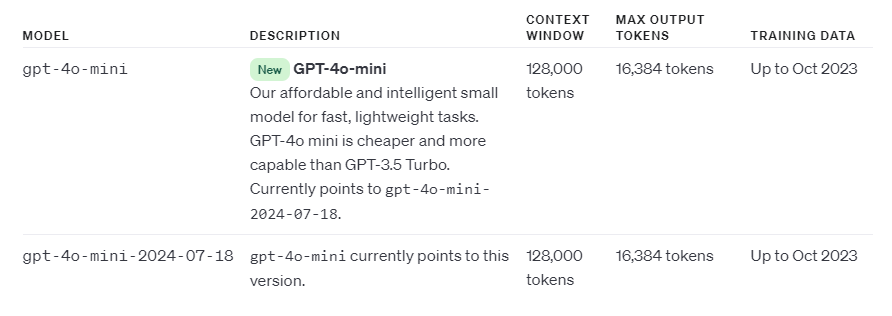

In [51]:
from langchain.chains.summarize import load_summarize_chain
import textwrap

llm = ChatOpenAI(temperature=0,                               # we define the model
                 model_name='gpt-4o-mini',
                 max_tokens=1024)

# map reduce is used for longer texts
# For example, if we're using gpt-4o-mini, the maximum input capacity is 128000 tokens.
# Assuming 1000 tokens roughly correspond to 1 page, 128000 tokens would be about 128 pages.
# We can provide a text of up to 128 pages to the GPT model in one go.
# However, for a text of 5000 pages, we would need to use methods like map_reduce or refine to summarize it.

In [52]:
from langchain.text_splitter import RecursiveCharacterTextSplitter, CharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=10000, chunk_overlap=0)
chunks = text_splitter.split_documents(pdf)

# In RAG chatbots, we can set the chunk size to correspond to a quarter or a fifth of a page.
# However, it is recommended to divide chunks so that each is approximately one page when summarizing.
# For text in Arial 11-point font, 10000 characters roughly equal one page.

# There's no need to use chunk_overlap because maintaining topic continuity isn't necessary here; we will be using the entire text anyway.

In [53]:
len(chunks)

16

In [54]:
chunks[0]

Document(metadata={'source': '/content/drive/MyDrive/N19-1423.pdf', 'page': 0}, page_content='Proceedings of NAACL-HLT 2019, pages 4171–4186\r\nMinneapolis, Minnesota, June 2 - June 7, 2019. \rc 2019 Association for Computational Linguistics\r\n4171\r\nBERT: Pre-training of Deep Bidirectional Transformers for\r\nLanguage Understanding\r\nJacob Devlin Ming-Wei Chang Kenton Lee Kristina Toutanova\r\nGoogle AI Language\r\n{jacobdevlin,mingweichang,kentonl,kristout}@google.com\r\nAbstract\r\nWe introduce a new language representa\x02tion model called BERT, which stands for\r\nBidirectional Encoder Representations from\r\nTransformers. Unlike recent language repre\x02sentation models (Peters et al., 2018a; Rad\x02ford et al., 2018), BERT is designed to pre\x02train deep bidirectional representations from\r\nunlabeled text by jointly conditioning on both\r\nleft and right context in all layers. As a re\x02sult, the pre-trained BERT model can be fine\x02tuned with just one additional output l

### Make A Brief Summary of The Entire Document With Chain_Types of "map_reduce" and "refine"

In [55]:
%%time
chain = load_summarize_chain(llm,
                             chain_type="map_reduce")    # loads a summarization chain using a language model thet we defined earlier .
                                                         # and specifies the chain type as "map-reduce"

output_summary = chain.invoke(chunks)["output_text"]     # It generates a summary for each of the 16 pages individually,
Markdown(output_summary)                                 # then combines the 16 summaries to produce a final summary. In total, this process is completed in 17 iterations.

CPU times: user 2.95 s, sys: 403 ms, total: 3.36 s
Wall time: 4min 53s


The paper presents BERT (Bidirectional Encoder Representations from Transformers), a groundbreaking language representation model developed by Google AI Language. BERT utilizes deep bidirectional representations, allowing it to consider both left and right context during pre-training on unlabeled text, which enhances its performance on various natural language processing (NLP) tasks. It employs a masked language model (MLM) and next sentence prediction (NSP) for pre-training, enabling effective fine-tuning with minimal task-specific adjustments. BERT achieves state-of-the-art results on eleven NLP benchmarks, including GLUE and SQuAD, outperforming previous models like OpenAI GPT and ELMo. The model's architecture includes a multi-layer bidirectional Transformer encoder, and it supports versatile input representations for single and paired sentences. The study highlights the significance of pre-training duration, masking strategies, and model size on performance, demonstrating that BERT's design and training methodology lead to substantial improvements in various NLP tasks. The code and pre-trained models are publicly available for further research and application.

In [56]:
chain

MapReduceDocumentsChain(llm_chain=LLMChain(prompt=PromptTemplate(input_variables=['text'], template='Write a concise summary of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:'), llm=ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x7d10a0882bf0>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x7d10a0881510>, root_client=<openai.OpenAI object at 0x7d10a08736a0>, root_async_client=<openai.AsyncOpenAI object at 0x7d10a0882c20>, model_name='gpt-4o-mini', temperature=0.0, openai_api_key=SecretStr('**********'), openai_proxy='', max_tokens=1024)), reduce_documents_chain=ReduceDocumentsChain(combine_documents_chain=StuffDocumentsChain(llm_chain=LLMChain(prompt=PromptTemplate(input_variables=['text'], template='Write a concise summary of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:'), llm=ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x7d10a0882bf0>, async_client=<openai.resources.chat.completions.As

In [57]:
# for summarizing each part/chunk
chain.llm_chain.prompt.template

'Write a concise summary of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:'

In [58]:
# for combining the parts
chain.combine_document_chain.llm_chain.prompt.template

'Write a concise summary of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:'

In [ ]:
# If there is more than one template in the chain, we cannot edit the prompts of these templates separately.
# When we change any template within the chain, all templates in the chain will change.

### Generate A Detailed Summary of The Entire Document With At Least 1000 Tokens. Also, Add A Title To The Summary And Present Key Points Using Bullet Points With Chain_Type of "map_reduce".

In [59]:
chain = load_summarize_chain(
    llm=llm,
    chain_type='map_reduce'
)
chain

MapReduceDocumentsChain(llm_chain=LLMChain(prompt=PromptTemplate(input_variables=['text'], template='Write a concise summary of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:'), llm=ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x7d10a0882bf0>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x7d10a0881510>, root_client=<openai.OpenAI object at 0x7d10a08736a0>, root_async_client=<openai.AsyncOpenAI object at 0x7d10a0882c20>, model_name='gpt-4o-mini', temperature=0.0, openai_api_key=SecretStr('**********'), openai_proxy='', max_tokens=1024)), reduce_documents_chain=ReduceDocumentsChain(combine_documents_chain=StuffDocumentsChain(llm_chain=LLMChain(prompt=PromptTemplate(input_variables=['text'], template='Write a concise summary of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:'), llm=ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x7d10a0882bf0>, async_client=<openai.resources.chat.completions.As

In [60]:
# prompt for every chunk
from langchain import PromptTemplate                         # we edit the prompt of the large language model that summarizes each chunk

chunks_prompt="""
Please summarize the below text:
text:'{text}'
summary:
"""
map_prompt_template=PromptTemplate(input_variables=['text'],
                                   template=chunks_prompt)

# text:'{text}'
# summary:
# this part allows the model to better understand our instructions

In [61]:
# prompt for combined summaries
final_combine_prompt="""
Provide a final summary of the entire text with at least 1000 tokens with important points.
Add a generic title,
Start the precise summary with an introduction and provide the summary in bullet points.
text: '{text}'
summary:
"""
final_combine_prompt_template=PromptTemplate(input_variables=['text'],
                                             template=final_combine_prompt)

In [62]:
chain = load_summarize_chain(
                            llm=llm,
                            chain_type='map_reduce',
                            map_prompt=map_prompt_template,               # prompt to summarize each chunk
                            combine_prompt=final_combine_prompt_template  # the prompt that will put all the summaries together and produce the final summary
)
chain

MapReduceDocumentsChain(llm_chain=LLMChain(prompt=PromptTemplate(input_variables=['text'], template="\nPlease summarize the below text:\ntext:'{text}'\nsummary:\n"), llm=ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x7d10a0882bf0>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x7d10a0881510>, root_client=<openai.OpenAI object at 0x7d10a08736a0>, root_async_client=<openai.AsyncOpenAI object at 0x7d10a0882c20>, model_name='gpt-4o-mini', temperature=0.0, openai_api_key=SecretStr('**********'), openai_proxy='', max_tokens=1024)), reduce_documents_chain=ReduceDocumentsChain(combine_documents_chain=StuffDocumentsChain(llm_chain=LLMChain(prompt=PromptTemplate(input_variables=['text'], template="\nProvide a final summary of the entire text with at least 1000 tokens with important points.\nAdd a generic title,\nStart the precise summary with an introduction and provide the summary in bullet points.\ntext: '{text}'\nsummary:\n"), llm=Ch

In [63]:
output_summary = chain.invoke(chunks)["output_text"]
output_summary

"# Comprehensive Overview of BERT: Innovations in Language Representation Models\n\n## Introduction\nBERT (Bidirectional Encoder Representations from Transformers) is a revolutionary language representation model developed by Google AI Language that has transformed the landscape of natural language processing (NLP). By utilizing deep bidirectional representations from unlabeled text, BERT is capable of understanding context from both directions—left and right—leading to significant improvements in performance across various NLP tasks. This summary encapsulates the key contributions, methodologies, and findings related to BERT, highlighting its impact on the field of NLP.\n\n## Summary of Key Points\n\n### BERT's Core Innovations\n- **Bidirectional Pre-training**: \n  - BERT employs a masked language model (MLM) that allows it to learn from both left and right contexts, contrasting with previous unidirectional models that only considered one direction.\n  \n- **Reduction of Task-Specifi

In [64]:
from IPython.display import Markdown

Markdown(output_summary)

# Comprehensive Overview of BERT: Innovations in Language Representation Models

## Introduction
BERT (Bidirectional Encoder Representations from Transformers) is a revolutionary language representation model developed by Google AI Language that has transformed the landscape of natural language processing (NLP). By utilizing deep bidirectional representations from unlabeled text, BERT is capable of understanding context from both directions—left and right—leading to significant improvements in performance across various NLP tasks. This summary encapsulates the key contributions, methodologies, and findings related to BERT, highlighting its impact on the field of NLP.

## Summary of Key Points

### BERT's Core Innovations
- **Bidirectional Pre-training**: 
  - BERT employs a masked language model (MLM) that allows it to learn from both left and right contexts, contrasting with previous unidirectional models that only considered one direction.
  
- **Reduction of Task-Specific Architectures**: 
  - The pre-trained representations of BERT reduce the necessity for complex, task-specific models, enabling it to achieve state-of-the-art performance across a variety of NLP tasks.

- **Performance Improvement**: 
  - BERT has outperformed existing models on eleven NLP tasks, with its code and pre-trained models made publicly available for further research and application.

### Training Methodologies
- **Unified Architecture**: 
  - BERT utilizes a multi-layer bidirectional Transformer encoder, which is effective for a wide range of NLP tasks.

- **Pre-training Phase**: 
  - The model is trained on unlabeled data using two primary tasks: Masked Language Modeling (MLM) and Next Sentence Prediction (NSP).
  
- **Fine-tuning Phase**: 
  - The pre-trained model is adapted to specific downstream tasks using labeled data, with minimal new parameters introduced primarily for classification layers.

### Input and Output Representations
- **Tokenization**: 
  - BERT employs WordPiece embeddings with a vocabulary of 30,000 tokens, effectively handling both single and paired sentences.

- **Special Tokens**: 
  - Each input sequence begins with a classification token ([CLS]), and sentences are separated using a special token ([SEP]).

### Pre-training Tasks
1. **Masked Language Model (MLM)**: 
   - Randomly masks a percentage of input tokens and predicts them, facilitating deep bidirectional representation.
   
2. **Next Sentence Prediction (NSP)**: 
   - Trains the model to understand relationships between sentences by predicting whether a second sentence logically follows the first.

### Performance on Benchmarks
- **GLUE Benchmark**: 
  - BERT models significantly outperform all others across various tasks, with BERTLARGE achieving an average accuracy improvement of 7.0% over the previous best.

- **SQuAD v1.1 and v2.0**: 
  - BERTLARGE achieves an F1 score of 87.4 on SQuAD 1.1, surpassing other models, including human performance, and shows notable improvement on SQuAD 2.0.

- **SWAG Dataset**: 
  - BERTLARGE excels in grounded common-sense inference tasks, outperforming other models by substantial margins.

### Insights from Ablation Studies
- **Impact of Pre-training Tasks**: 
  - Omitting the NSP task leads to a significant drop in performance, underscoring the importance of bidirectionality in training.

- **Model Size**: 
  - Larger BERT models consistently achieve better accuracy, indicating that increased model size enhances performance.

- **Importance of Extensive Pre-training**: 
  - BERT requires extensive pre-training (1 million steps) to achieve optimal performance, with a notable increase in accuracy observed when pre-training is extended.

- **Comparison of Masking Strategies**: 
  - The MLM approach converges at a slower rate compared to left-to-right models but ultimately outperforms them in accuracy, highlighting its effectiveness in capturing contextual relationships.

- **Challenges with Masking Strategies**: 
  - The study identifies limitations with the MASK strategy in feature-based approaches, particularly in named entity recognition (NER) tasks.

- **Effectiveness of Mixed Masking Strategy**: 
  - BERT's mixed masking strategy enhances model performance, while reliance on random tokens for masking leads to suboptimal results.

### Fine-tuning Approaches
- **Feature-based vs. Fine-tuning**: 
  - The feature-based approach offers computational advantages and flexibility, performing competitively with state-of-the-art methods.

### Hyperparameter Tuning
- **Sensitivity to Hyperparameters**: 
  - Larger datasets exhibit less sensitivity to hyperparameter choices, indicating the necessity for exhaustive searches for optimal parameters.

### Comparison with Other Models
- **Architectural Differences**: 
  - BERT's bidirectional architecture and pre-training tasks significantly contribute to its performance improvements compared to models like OpenAI GPT and ELMo.

### Conclusion
BERT's architecture and training strategies signify a substantial advancement in natural language understanding

### **2. Summarizing with the 'Refine' Chain**

This method involves **an initial prompt on the first chunk of data, generating some output. For the remaining documents, that output is passed in, along with the next document**, asking the LLM to refine the output based on the new document.

**Pros:** Can pull in more relevant context, and may be less lossy than MapReduceDocumentsChain.

**Cons:** Requires many more calls to the LLM than StuffDocumentsChain. The calls are also NOT independent, meaning they cannot be paralleled like MapReduceDocumentsChain. There is also some potential dependencies on the ordering of the documents.

In [65]:
%%time
chain = load_summarize_chain(llm,                        # loads a summarization chain using a language model thet we defined earlier.
                             chain_type="refine")        # and specifies the chain type as "refine"

output_summary = chain.invoke(chunks)["output_text"]

CPU times: user 1.8 s, sys: 212 ms, total: 2.01 s
Wall time: 4min 48s


In [ ]:
chain

RefineDocumentsChain(initial_llm_chain=LLMChain(prompt=PromptTemplate(input_variables=['text'], template='Write a concise summary of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:'), llm=ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x78748bf02f50>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x78748bf41930>, root_client=<openai.OpenAI object at 0x787494191660>, root_async_client=<openai.AsyncOpenAI object at 0x78748bf01bd0>, model_name='gpt-4o-mini', temperature=0.0, openai_api_key=SecretStr('**********'), openai_proxy='', max_tokens=1024)), refine_llm_chain=LLMChain(prompt=PromptTemplate(input_variables=['existing_answer', 'text'], template="Your job is to produce a final summary.\nWe have provided an existing summary up to a certain point: {existing_answer}\nWe have the opportunity to refine the existing summary (only if needed) with some more context below.\n------------\n{text}\n------------\nGiven the new context, re

In [ ]:
Markdown(output_summary)

The paper introduces BERT (Bidirectional Encoder Representations from Transformers), a novel language representation model developed by Google AI Language. Unlike previous models that use unidirectional context, BERT pre-trains deep bidirectional representations from unlabeled text, allowing it to consider both left and right context. This design enables BERT to be fine-tuned with minimal additional architecture for various natural language processing tasks, achieving state-of-the-art results on eleven benchmarks, including significant improvements in GLUE, MultiNLI, and SQuAD tasks.

BERT employs a masked language model (MLM) pre-training objective, which enhances its effectiveness for both sentence-level and token-level tasks by fusing left and right context. The MLM involves randomly masking a percentage of input tokens and predicting them, allowing the model to learn bidirectional representations. Specifically, during the masking procedure, 80% of the time a token is replaced with a [MASK] token, 10% of the time it is replaced with a random word, and 10% of the time it remains unchanged. This approach ensures that the model maintains a contextual representation of every input token. Additionally, BERT incorporates a "next sentence prediction" (NSP) task that trains the model to understand the relationship between sentence pairs, which is crucial for tasks like Question Answering (QA) and Natural Language Inference (NLI). The NSP task is designed to transfer all parameters to initialize end-task model parameters, unlike prior work that only transferred sentence embeddings.

The model architecture is based on a multi-layer bidirectional Transformer encoder, with two primary sizes: BERTBASE and BERTLARGE, which differ in the number of layers, hidden size, and total parameters. The input representation can handle both single sentences and pairs of sentences, using WordPiece embeddings with a 30,000 token vocabulary. The input embeddings are the sum of token embeddings, segment embeddings, and position embeddings, with the first token of every sequence being a special classification token ([CLS]). The final hidden state corresponding to this token is used as the aggregate sequence representation for classification tasks.

Fine-tuning BERT is straightforward due to the self-attention mechanism in the Transformer, allowing it to model various downstream tasks by simply plugging in task-specific inputs and outputs. This process is relatively inexpensive, with results replicable in a short time on standard hardware. The contributions of the paper include demonstrating the importance of bidirectional pre-training for language representations, showing that pre-trained representations reduce the need for heavily-engineered task-specific architectures, and advancing the state of the art for eleven NLP tasks.

BERTBASE and BERTLARGE significantly outperform previous state-of-the-art models across all tasks, achieving average accuracy improvements of 4.5% and 7.0%, respectively, on the GLUE benchmark. For instance, BERTLARGE achieved an accuracy of 86.7% on MNLI, surpassing OpenAI GPT's 82.1%. In the SQuAD v1.1 task, BERT demonstrated superior performance, with BERTLARGE (Single) achieving an F1 score of 90.9, outperforming the top leaderboard systems, including an ensemble of nlnet and QANet. In SQuAD v2.0, BERT also showed a +5.1 F1 improvement over the previous best system, demonstrating its robustness in handling more complex question-answering scenarios. Additionally, BERTLARGE outperformed the authors’ baseline systems in the SWAG dataset by a significant margin.

Ablation studies highlighted the importance of the NSP task, showing that removing it significantly degrades performance on tasks like QNLI, MNLI, and SQuAD. Further analysis indicated that larger models consistently lead to improved accuracy across various tasks, even those with limited training data, underscoring the effectiveness of BERT's architecture and pre-training strategy. Additional ablation studies examined the effect of the number of training steps and different masking procedures during MLM pre-training. Results showed that BERTBASE benefits from extensive pre-training, achieving higher accuracy with more training steps, and that the mixed masking strategy used during pre-training is robust, although certain strategies can negatively impact performance in feature-based approaches.

The paper also explores the feature-based approach, demonstrating that BERT can be effectively utilized for tasks like Named Entity Recognition (NER) by extracting fixed features from the pre-trained model, which can be beneficial for certain tasks and computationally efficient. The code and pre-trained models are available at https://github.com/google-research/bert.

Overall, BERT's architecture, which uniquely combines bidirectional context and a fine-tuning approach, sets it apart from previous models like OpenAI GPT and ELMo, leading to significant advancements in the field of natural language processing. The paper also notes that fine-tuning is typically fast and less sensitive to hyperparameter choices when large datasets (e.g., 100k+ labeled training examples) are used, allowing for an exhaustive search over parameters to optimize performance on development sets. Comparisons with ELMo and

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___